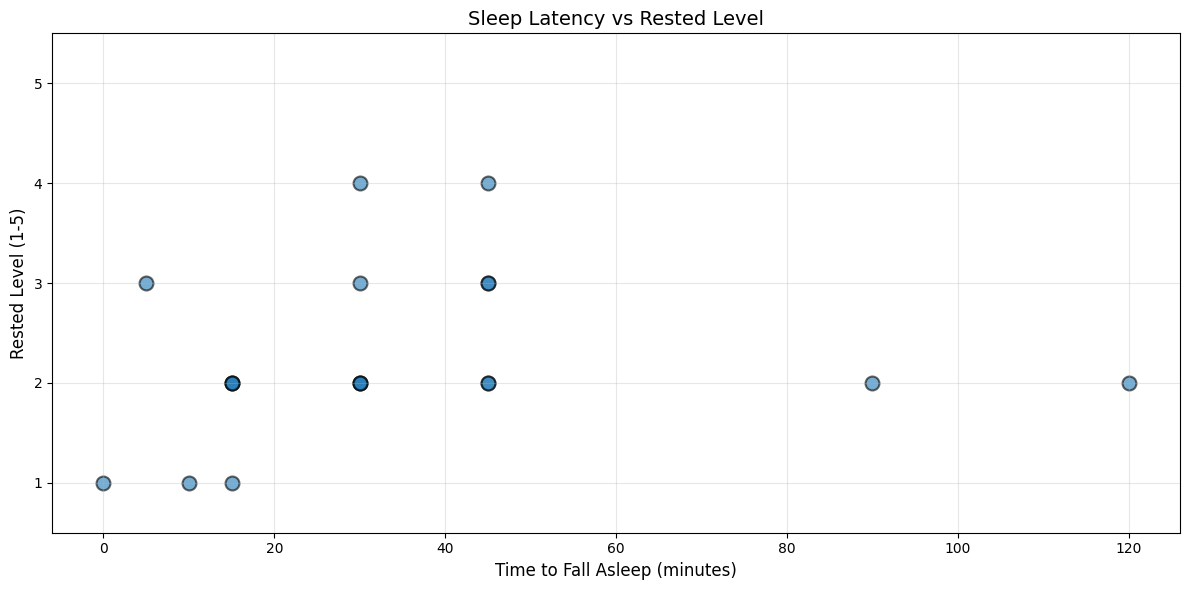

In [1]:
    import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the survey data
survey_df = pd.read_csv('survey-responses.csv')

# Convert time to fall asleep to minutes
def time_to_minutes(time_str):
    if pd.isna(time_str) or time_str == 'X':
        return np.nan
    try:
        time_str = str(time_str).strip()
        time_obj = pd.to_datetime(time_str, format='%H:%M:%S').time()
        total_minutes = time_obj.hour * 60 + time_obj.minute
        return total_minutes
    except:
        return np.nan

survey_df['sleep_latency_minutes'] = survey_df['How long did it take you to fall asleep?'].apply(time_to_minutes)
survey_df['rested_level'] = pd.to_numeric(survey_df['From scale 1 to 5, how rested do you feel?'], errors='coerce')

# Filter valid data
valid_data = survey_df[(survey_df['sleep_latency_minutes'].notna()) & (survey_df['rested_level'].notna())].copy()

# Create scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(valid_data['sleep_latency_minutes'], valid_data['rested_level'],
            s=100, alpha=0.6, edgecolors='black', linewidth=1.5)
plt.xlabel('Time to Fall Asleep (minutes)', fontsize=12)
plt.ylabel('Rested Level (1-5)', fontsize=12)
plt.title('Sleep Latency vs Rested Level', fontsize=14)
plt.grid(True, alpha=0.3)

# Set y-axis to show full scale 1-5
plt.yticks([1, 2, 3, 4, 5])
plt.ylim(0.5, 5.5)

plt.tight_layout()
plt.savefig('sleep_latency_vs_rested.png', dpi=300, bbox_inches='tight')
plt.show()